In [74]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm_drop.xlsx")



In [75]:
data_main

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,0.0,0.260917,0.242424
635,635,0.0,0.260917,0.242424


In [76]:
data

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,NaN,NaN,NaN
635,635,0.0,0.260917,0.242424


In [77]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

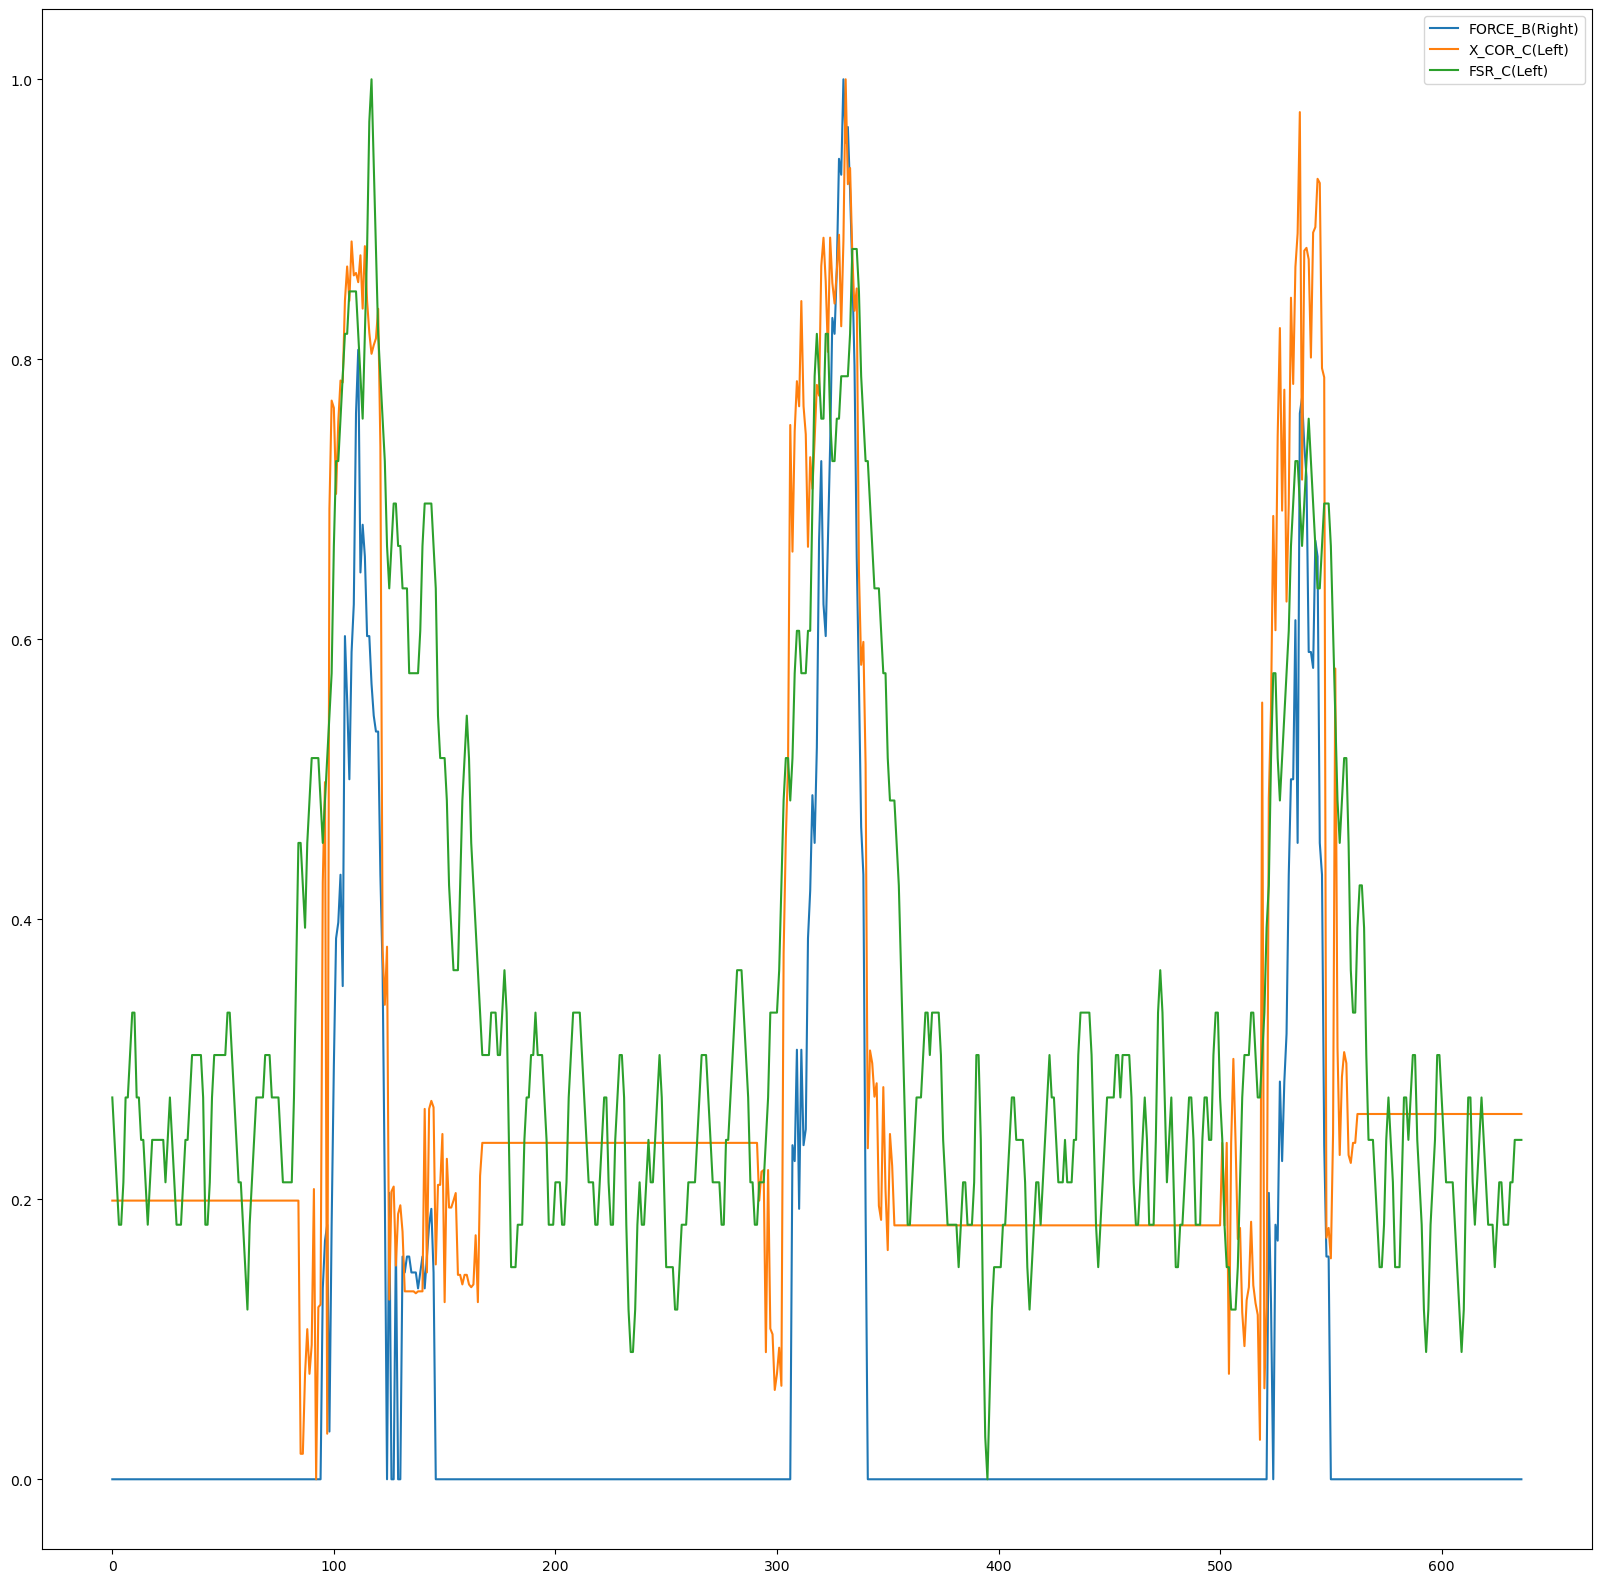

In [78]:
data_main.plot(figsize=(20,20))

<Axes: >

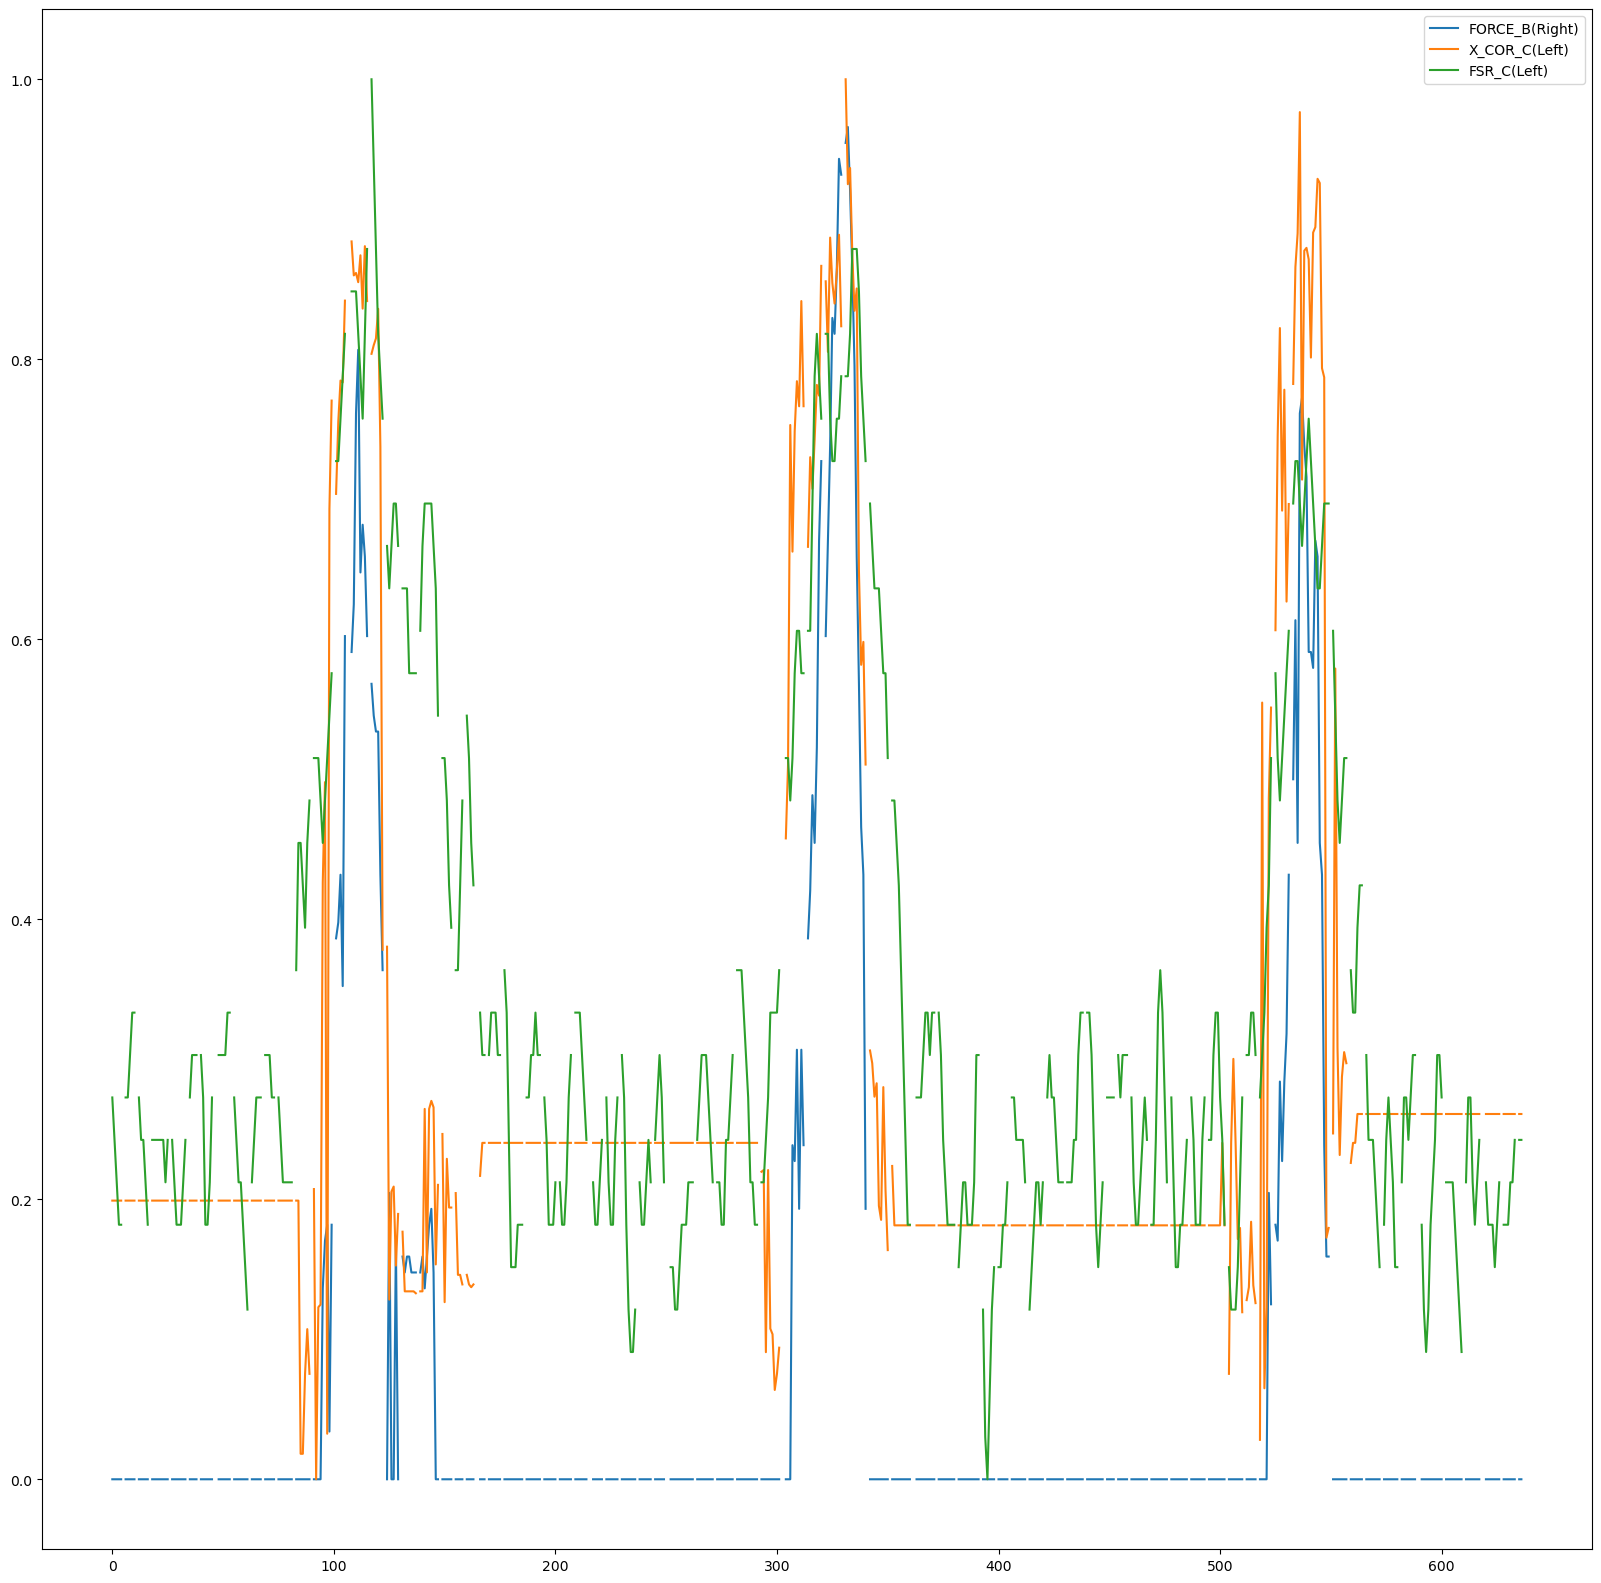

In [79]:
data.plot(figsize=(20,20))

In [80]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)    87
X_COR_C(Left)     87
FSR_C(Left)       87
dtype: int64
FORCE_B(Right)    0
X_COR_C(Left)     0
FSR_C(Left)       0
dtype: int64


FORCE_B(Right)


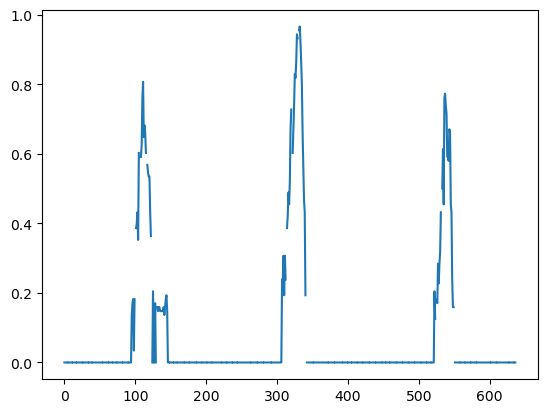

X_COR_C(Left)


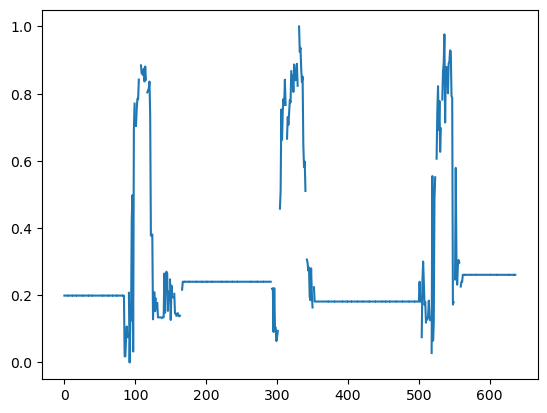

FSR_C(Left)


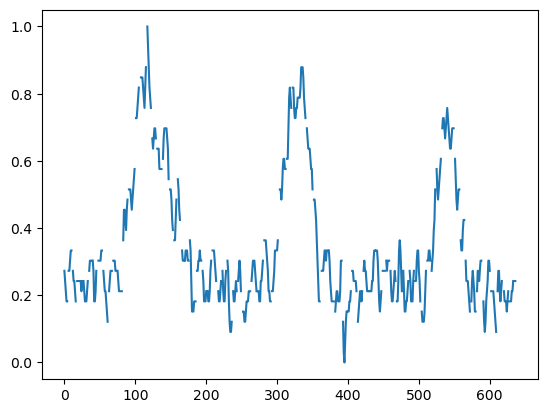

In [81]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [82]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [83]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_data_main.xlsx")

data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)




In [84]:
data_sca.columns

Index(['X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [90]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(data_sca)
L_scaled=pd.DataFrame(data=R_scaled)





In [91]:
L_scaled

,0,1
0,0.199050,0.272727
1,0.199050,0.242424
2,0.199050,0.212121
3,0.199050,0.181818
4,0.199050,0.181818
...,...,...
632,0.260917,0.212121
633,0.260917,0.242424
634,0.260917,0.242424
635,0.260917,0.242424


In [92]:
L_new=L_scaled.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")



In [93]:
R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['X_COR_C(Left)','FSR_C(Left)']]

<Axes: >

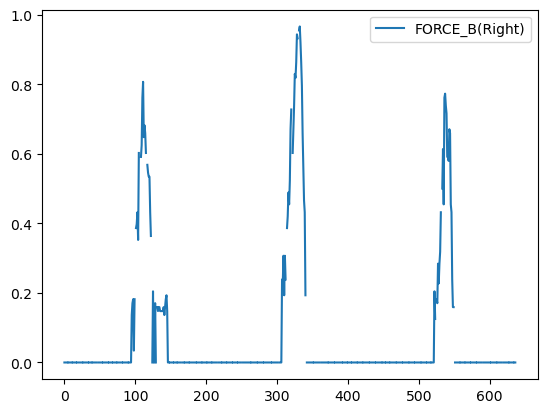

In [94]:
R.plot()

<Axes: >

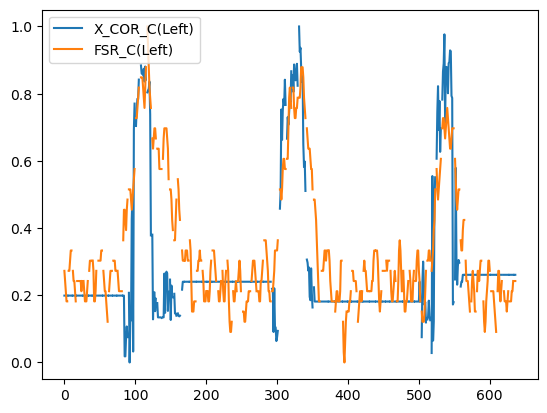

In [95]:
L.plot()

In [96]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [97]:
index=L.index

loss_index_L_XCOR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_XCOR_C=np.setdiff1d(index,loss_index_L_XCOR_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [98]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [99]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_XCOR_C=L.iloc[normal_index_L_XCOR_C,0]
x_test_L_XCOR_C=loss_index_L_XCOR_C

y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_XCOR_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [100]:
x_train_R_FORCE_B=x_train_R_FORCE_B.reshape(x_train_R_FORCE_B.shape[0],x_train_R_FORCE_B.shape[1],1)
x_test_L_XCOR_C=x_test_L_XCOR_C.reshape(x_test_L_XCOR_C.shape[0],x_test_L_XCOR_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [101]:
#[I 2023-11-30 20:50:55,017] Trial 19 finished with value: 0.04374462542982873 and parameters: {'batch_size': 129, 'steps_per_epoch': 9, 'epochs': 3954, 'filter': 200, 'lstm_par1': 222, 'lstm_par2': 185, 'lstm_par3': 301, 'lstm_par4': 159, 'dense_par': 35, 'dense_par2': 53, 'dense_par3': 75, 'dense_par4': 23, 'dim1': 5, 'dim2': 5, 'dim3': 4, 'dim4': 9}. Best is trial 17 with value: 0.021876805800252606.
#{'batch_size': 148, 'steps_per_epoch': 9, 'epochs': 3354, 'filter': 200, 'lstm_par1': 254, 'lstm_par2': 197, 'lstm_par3': 319, 'lstm_par4': 179, 'dense_par': 39, 'dense_par2': 56, 'dense_par3': 89, 'dense_par4': 28, 'dim1': 5, 'dim2': 2, 'dim3': 10, 'dim4': 8}



In [102]:

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=150, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(254, activation='relu',return_sequences=True))
model_cnn_lstm.add(LSTM(197, activation='relu',return_sequences=True))
    #model_cnn_lstm.add(LSTM(lstm_par3, activation='relu',return_sequences=True))
    #model_cnn_lstm.add(LSTM(lstm_par4, activation='relu',return_sequences=True))
model_cnn_lstm.add(TimeDistributed(Dense(39, activation='relu',kernel_initializer = 'uniform',input_dim=5)))
model_cnn_lstm.add(TimeDistributed(Dense(56, activation='relu',kernel_initializer = 'uniform',input_dim=2)))
model_cnn_lstm.add(TimeDistributed(Dense(89, activation='relu',kernel_initializer = 'uniform',input_dim=10)))
model_cnn_lstm.add(TimeDistributed(Dense(28, activation='relu',kernel_initializer = 'uniform',input_dim=8)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')
model_cnn_lstm.summary()      


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_48 (TimeDi  (None, None, 1, 150)     300       
 stributed)                                                      
                                                                 
 time_distributed_49 (TimeDi  (None, None, 1, 150)     0         
 stributed)                                                      
                                                                 
 time_distributed_50 (TimeDi  (None, None, 150)        0         
 stributed)                                                      
                                                                 
 lstm_12 (LSTM)              (None, None, 254)         411480    
                                                                 
 lstm_13 (LSTM)              (None, None, 197)         356176    
                                                      

In [103]:
model_cnn_lstm.fit(x_train_R_FORCE_B,y_train_L_XCOR_C,epochs=10000,verbose=2,batch_size=150,steps_per_epoch=3)
pred=model_cnn_lstm.predict(x_test_L_XCOR_C)
pred=pred.reshape(-1,1)

Epoch 1/10000
3/3 - 1s - loss: 0.1241 - 1s/epoch - 373ms/step
Epoch 2/10000
3/3 - 0s - loss: 0.0977 - 27ms/epoch - 9ms/step
Epoch 3/10000
3/3 - 0s - loss: 0.0611 - 40ms/epoch - 13ms/step
Epoch 4/10000
3/3 - 0s - loss: 0.0595 - 27ms/epoch - 9ms/step
Epoch 5/10000
3/3 - 0s - loss: 0.0548 - 26ms/epoch - 9ms/step
Epoch 6/10000
3/3 - 0s - loss: 0.0507 - 21ms/epoch - 7ms/step
Epoch 7/10000
3/3 - 0s - loss: 0.0508 - 22ms/epoch - 7ms/step
Epoch 8/10000
3/3 - 0s - loss: 0.0490 - 23ms/epoch - 8ms/step
Epoch 9/10000
3/3 - 0s - loss: 0.0480 - 32ms/epoch - 11ms/step
Epoch 10/10000
3/3 - 0s - loss: 0.0469 - 22ms/epoch - 7ms/step
Epoch 11/10000
3/3 - 0s - loss: 0.0509 - 28ms/epoch - 9ms/step
Epoch 12/10000
3/3 - 0s - loss: 0.0435 - 23ms/epoch - 8ms/step
Epoch 13/10000
3/3 - 0s - loss: 0.0455 - 24ms/epoch - 8ms/step
Epoch 14/10000
3/3 - 0s - loss: 0.0431 - 20ms/epoch - 7ms/step
Epoch 15/10000
3/3 - 0s - loss: 0.0417 - 23ms/epoch - 8ms/step
Epoch 16/10000
3/3 - 0s - loss: 0.0479 - 25ms/epoch - 8ms/step

In [104]:
c=0
for i in loss_index_L_XCOR_C:    
    L_XCOR_C[i]=pred[c]
    c+=1

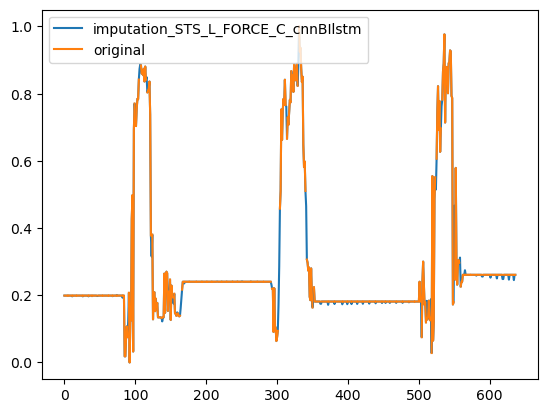

In [105]:
import matplotlib.pyplot as plt 
plt.plot(L_XCOR_C,label='imputation_STS_L_FORCE_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [106]:
#[I 2023-11-30 23:49:16,953] Trial 19 finished with value: 0.01963255381643017 and parameters: {'batch_size': 177, 'steps_per_epoch': 5, 'epochs': 2781, 'filter': 29, 'lstm_par1': 164, 'lstm_par2': 236, 'lstm_par3': 104, 'lstm_par4': 329, 'dense_par': 37, 'dense_par2': 44, 'dense_par3': 99, 'dense_par4': 42, 'dim1': 2, 'dim2': 2, 'dim3': 7, 'dim4': 7}. Best is trial 2 with value: 0.015965078100116804.
#{'batch_size': 197, 'steps_per_epoch': 9, 'epochs': 2684, 'filter': 75, 'lstm_par1': 281, 'lstm_par2': 231, 'lstm_par3': 436, 'lstm_par4': 377, 'dense_par': 29, 'dense_par2': 41, 'dense_par3': 97, 'dense_par4': 55, 'dim1': 2, 'dim2': 3, 'dim3': 8, 'dim4': 1}


In [107]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=75, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(281, activation='relu',return_sequences=True))
model_cnn_lstm.add(LSTM(231, activation='relu',return_sequences=True))
    #model_cnn_lstm.add(LSTM(lstm_par3, activation='relu',return_sequences=True))
    #model_cnn_lstm.add(LSTM(lstm_par4, activation='relu',return_sequences=True))
model_cnn_lstm.add(TimeDistributed(Dense(29, activation='relu',kernel_initializer = 'uniform',input_dim=2)))
model_cnn_lstm.add(TimeDistributed(Dense(41, activation='relu',kernel_initializer = 'uniform',input_dim=3)))
model_cnn_lstm.add(TimeDistributed(Dense(97, activation='relu',kernel_initializer = 'uniform',input_dim=8)))
model_cnn_lstm.add(TimeDistributed(Dense(55, activation='relu',kernel_initializer = 'uniform',input_dim=3)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')
model_cnn_lstm.summary()    

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_56 (TimeDi  (None, None, 1, 75)      150       
 stributed)                                                      
                                                                 
 time_distributed_57 (TimeDi  (None, None, 1, 75)      0         
 stributed)                                                      
                                                                 
 time_distributed_58 (TimeDi  (None, None, 75)         0         
 stributed)                                                      
                                                                 
 lstm_14 (LSTM)              (None, None, 281)         401268    
                                                                 
 lstm_15 (LSTM)              (None, None, 231)         474012    
                                                      

In [108]:
model_cnn_lstm.fit(x_train_R_FORCE_B,y_train_L_FSR_C,epochs=10000,verbose=2,batch_size=197,steps_per_epoch=2)

Epoch 1/10000
2/2 - 1s - loss: 0.1548 - 980ms/epoch - 490ms/step
Epoch 2/10000
2/2 - 0s - loss: 0.1523 - 17ms/epoch - 8ms/step
Epoch 3/10000
2/2 - 0s - loss: 0.1422 - 21ms/epoch - 10ms/step
Epoch 4/10000
2/2 - 0s - loss: 0.1102 - 15ms/epoch - 7ms/step
Epoch 5/10000
2/2 - 0s - loss: 0.0972 - 14ms/epoch - 7ms/step
Epoch 6/10000
2/2 - 0s - loss: 0.0741 - 18ms/epoch - 9ms/step
Epoch 7/10000
2/2 - 0s - loss: 0.0785 - 19ms/epoch - 9ms/step
Epoch 8/10000
2/2 - 0s - loss: 0.0550 - 17ms/epoch - 8ms/step
Epoch 9/10000
2/2 - 0s - loss: 0.0652 - 19ms/epoch - 9ms/step
Epoch 10/10000
2/2 - 0s - loss: 0.0544 - 18ms/epoch - 9ms/step
Epoch 11/10000
2/2 - 0s - loss: 0.0562 - 17ms/epoch - 8ms/step
Epoch 12/10000
2/2 - 0s - loss: 0.0528 - 16ms/epoch - 8ms/step
Epoch 13/10000
2/2 - 0s - loss: 0.0447 - 17ms/epoch - 9ms/step
Epoch 14/10000
2/2 - 0s - loss: 0.0430 - 19ms/epoch - 10ms/step
Epoch 15/10000
2/2 - 0s - loss: 0.0416 - 15ms/epoch - 8ms/step
Epoch 16/10000
2/2 - 0s - loss: 0.0394 - 17ms/epoch - 8ms/s

In [109]:
pred=model_cnn_lstm.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 0s 2ms/step


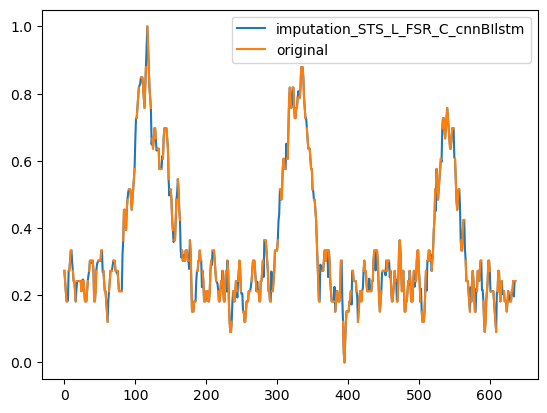

In [110]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    #
plt.plot(L_FSR_C,label='imputation_STS_L_FSR_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [111]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['X_COR_C(Left)'],L_XCOR_C))
print(RMSE(data_main['FSR_C(Left)'],L_FSR_C))

0.01968119621716646
0.017029268535141657


In [112]:
L.isnull().sum()

X_COR_C(Left)    87
FSR_C(Left)      87
dtype: int64

In [113]:
L=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")

In [114]:
for i in loss_index_L_XCOR_C:    
    L['X_COR_C(Left)'][i]=L_XCOR_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR_C(Left)'][i]=L_FSR_C[i]

In [115]:
L.isnull().sum()

X_COR_C(Left)    0
FSR_C(Left)      0
dtype: int64

<Axes: >

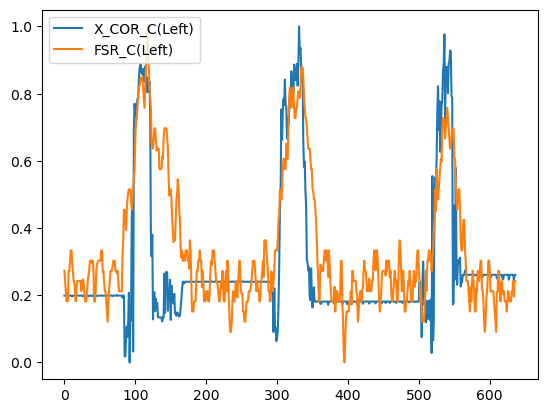

In [116]:
L=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L.plot()

<Axes: >

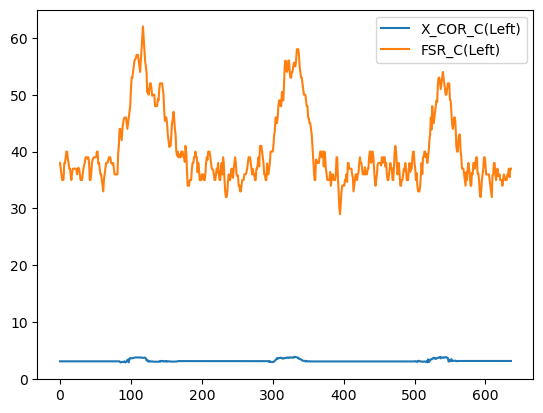

In [117]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L_sca.plot()